In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

# Load data
df = pd.read_csv("/content/insurance_premium_dataset_50000_records.csv")

# Basic info
print(df.shape)
df.head()

(5937, 33)


,city_name,locality_type,locality_name,latitude,longitude,avg_aqi,water_quality_index,natural_disaster_risk,climate_change_risk_score,heatwave_days_per_year,...,gender,annual_income_lakh,occupation_risk_level,smoker,alcohol_consumption,pre_existing_conditions,physical_activity_level,family_medical_history,health_checkup_frequency,insurance_premium
0,DELHI-NCR,Slum Areas,Seemapuri,28.68,77.18,115,57,high,0.89,8,...,Female,73.24,Low,0,NaN,0,Moderate,1,Rare,13928.0
1,MUMBAI,Commercial Areas,Fort,18.98,72.95,61,63,medium,0.29,60,...,Male,38.78,Medium,0,Regular,1,Low,1,Rare,12846.0
2,DELHI-NCR,Low-Income Areas,Mangolpuri,28.60,77.17,108,72,high,0.49,15,...,Male,58.97,Low,1,NaN,1,Moderate,0,Rare,17363.0
3,BENGALURU,High-Income Areas,RMV Extension,13.04,77.52,122,70,low,0.81,8,...,Male,28.56,High,0,NaN,1,Moderate,0,Bi-Annual,15992.0
4,HYDERABAD,Commercial Areas,Jubilee Hills,17.32,78.42,161,71,low,0.45,41,...,Female,42.86,Medium,0,Regular,0,Low,1,Rare,11623.0


Data overview

In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   city_name                  5937 non-null   object 
 1   locality_type              5937 non-null   object 
 2   locality_name              5937 non-null   object 
 3   latitude                   5937 non-null   float64
 4   longitude                  5937 non-null   float64
 5   avg_aqi                    5937 non-null   int64  
 6   water_quality_index        5937 non-null   int64  
 7   natural_disaster_risk      5937 non-null   object 
 8   climate_change_risk_score  5937 non-null   float64
 9   heatwave_days_per_year     5937 non-null   int64  
 10  elevation_meters           5937 non-null   int64  
 11  terrain_type               5937 non-null   object 
 12  distance_from_coast_km     5937 non-null   float64
 13  urban_flood_risk           5937 non-null   objec

,latitude,longitude,avg_aqi,water_quality_index,climate_change_risk_score,heatwave_days_per_year,elevation_meters,distance_from_coast_km,road_condition_index,drainage_quality_index,...,traffic_density_index,respiratory_disease_rate,waterborne_disease_rate,vector_borne_disease_rate,age,annual_income_lakh,smoker,pre_existing_conditions,family_medical_history,insurance_premium
count,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000,...,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000,5936.000000
mean,18.914240,79.309990,118.195048,65.765875,0.568029,32.534782,445.880074,158.384218,3.114873,3.141317,...,2.886643,0.484287,0.334881,0.379848,45.884117,40.590803,0.307731,0.249284,0.414688,12643.141846
std,5.412753,4.771515,34.937218,14.110596,0.191799,16.052071,260.141075,220.467593,1.388588,1.370932,...,1.378668,0.228211,0.152386,0.184698,16.464095,22.670313,0.461594,0.432635,0.492710,2630.510055
min,12.870000,72.770000,60.000000,40.000000,0.200000,5.000000,8.000000,0.030000,1.000000,1.000000,...,1.000000,0.100000,0.060000,0.050000,18.000000,1.520000,0.000000,0.000000,0.000000,5422.000000
25%,13.100000,77.220000,87.000000,53.000000,0.420000,18.000000,215.000000,1.940000,2.000000,2.000000,...,2.000000,0.290000,0.220000,0.230000,32.000000,21.030000,0.000000,0.000000,0.000000,10759.000000
50%,17.480000,78.410000,118.000000,68.000000,0.560000,31.000000,446.000000,56.910000,3.000000,3.000000,...,3.000000,0.470000,0.340000,0.380000,46.000000,40.360000,0.000000,0.000000,0.000000,12422.500000
75%,22.580000,80.290000,150.000000,76.000000,0.730000,47.000000,670.000000,249.170000,4.000000,4.000000,...,4.000000,0.680000,0.460000,0.530000,60.000000,59.990000,1.000000,0.000000,1.000000,14387.000000
max,28.710000,88.460000,180.000000,90.000000,0.900000,60.000000,899.000000,984.450000,5.000000,5.000000,...,5.000000,0.880000,0.600000,0.700000,74.000000,79.950000,1.000000,1.000000,1.000000,22487.000000


Missing values

In [3]:
df.isnull().sum()


,0
city_name,0
locality_type,0
locality_name,0
latitude,0
longitude,0
avg_aqi,0
water_quality_index,0
natural_disaster_risk,0
climate_change_risk_score,0
heatwave_days_per_year,0


Unique values (sanity check)

In [4]:
for col in ["city_name", "locality_type", "terrain_type"]:
    print(col, ":", df[col].nunique())


city_name : 6
locality_type : 7
terrain_type : 3


Target Variable Deep Dive (Insurance Premium)

Distribution & skewness

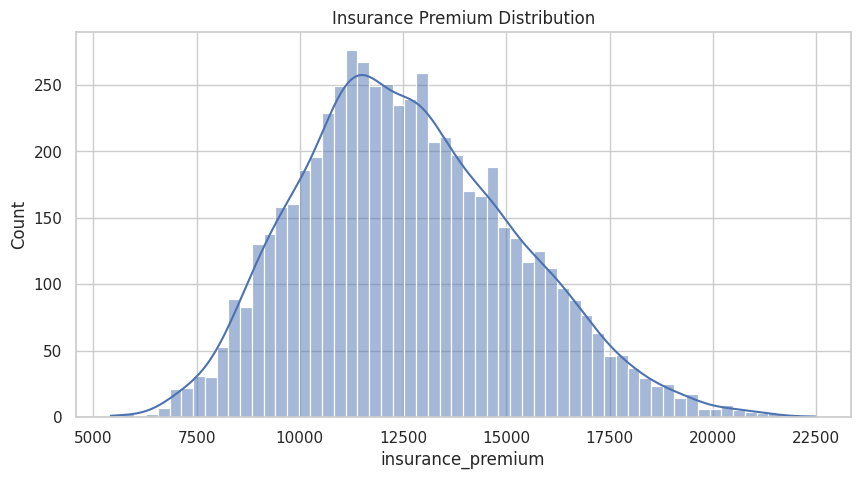

Skewness: 0.3691202019877915


In [5]:
sns.histplot(df["insurance_premium"], bins=60, kde=True)
plt.title("Insurance Premium Distribution")
plt.show()

print("Skewness:", df["insurance_premium"].skew())


Log transform (for modeling intuition)

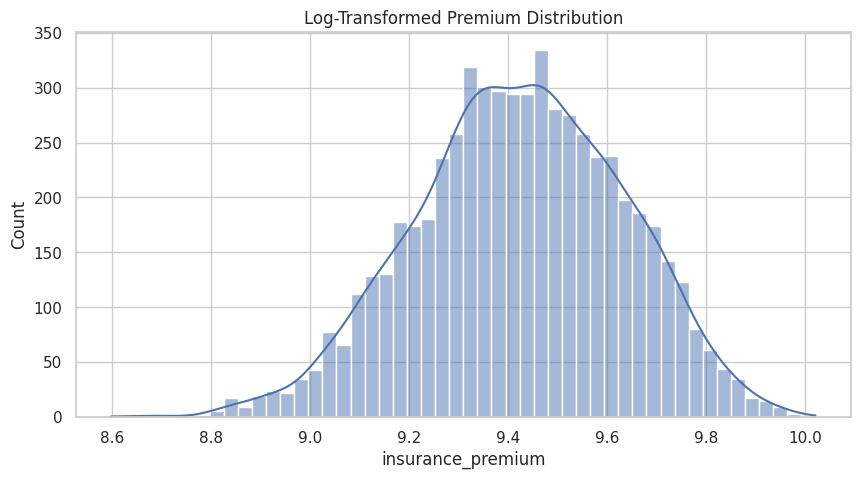

In [6]:
sns.histplot(np.log1p(df["insurance_premium"]), bins=50, kde=True)
plt.title("Log-Transformed Premium Distribution")
plt.show()


City-wise & Locality-wise Risk Profiling

Average premium by city

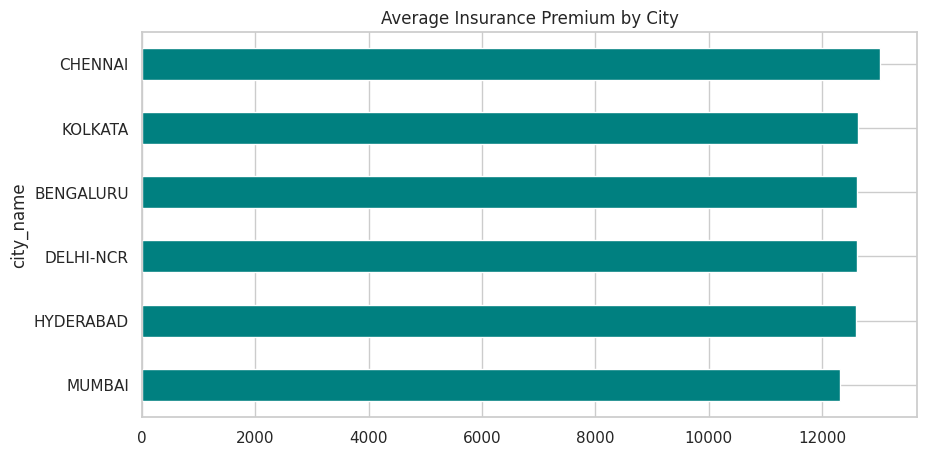

In [7]:
city_premium = df.groupby("city_name")["insurance_premium"].mean().sort_values()

city_premium.plot(kind="barh", color="teal")
plt.title("Average Insurance Premium by City")
plt.show()


Locality type vs premium

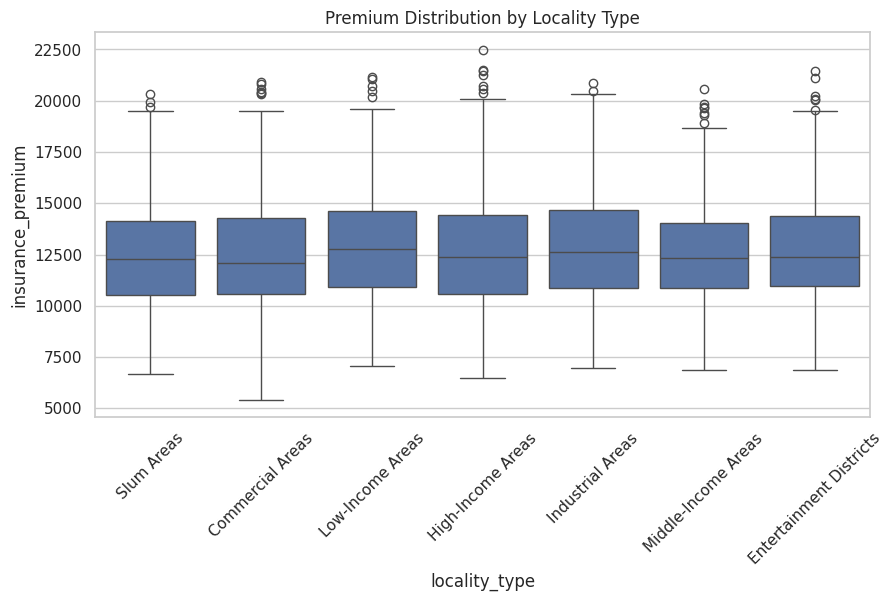

In [8]:
sns.boxplot(x="locality_type", y="insurance_premium", data=df)
plt.xticks(rotation=45)
plt.title("Premium Distribution by Locality Type")
plt.show()


City + locality interaction

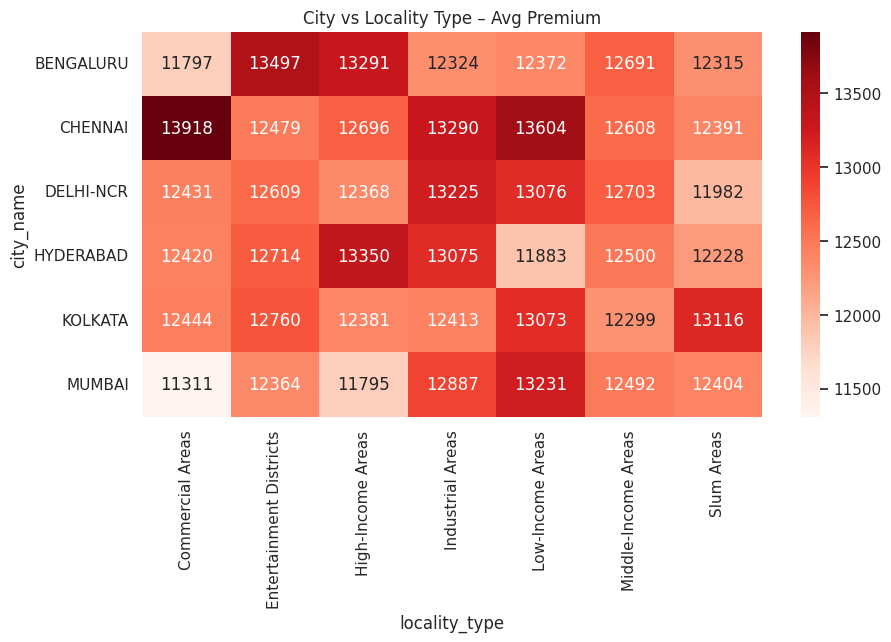

In [9]:
pivot = pd.pivot_table(
    df,
    values="insurance_premium",
    index="city_name",
    columns="locality_type",
    aggfunc="mean"
)

sns.heatmap(pivot, cmap="Reds", annot=True, fmt=".0f")
plt.title("City vs Locality Type – Avg Premium")
plt.show()


Environmental Risk Analysis

AQI impact

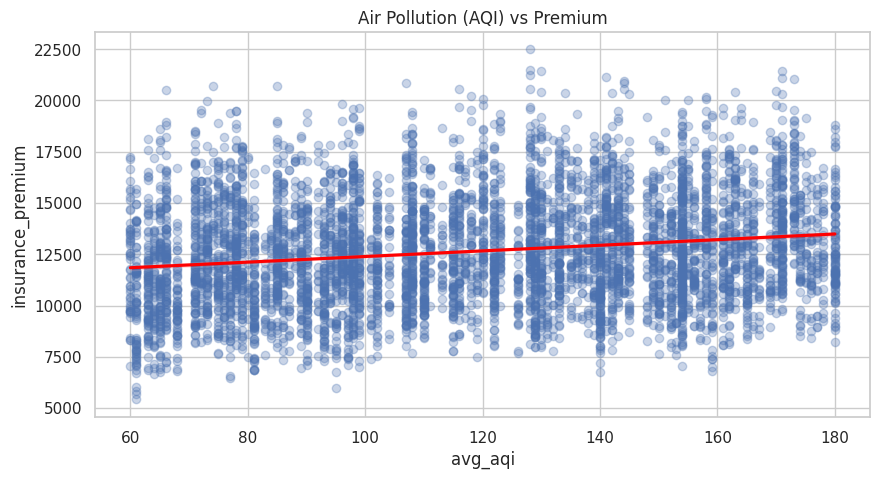

In [10]:
sns.regplot(
    x="avg_aqi",
    y="insurance_premium",
    data=df,
    scatter_kws={"alpha":0.3},
    line_kws={"color":"red"}
)
plt.title("Air Pollution (AQI) vs Premium")
plt.show()


Climate risk score

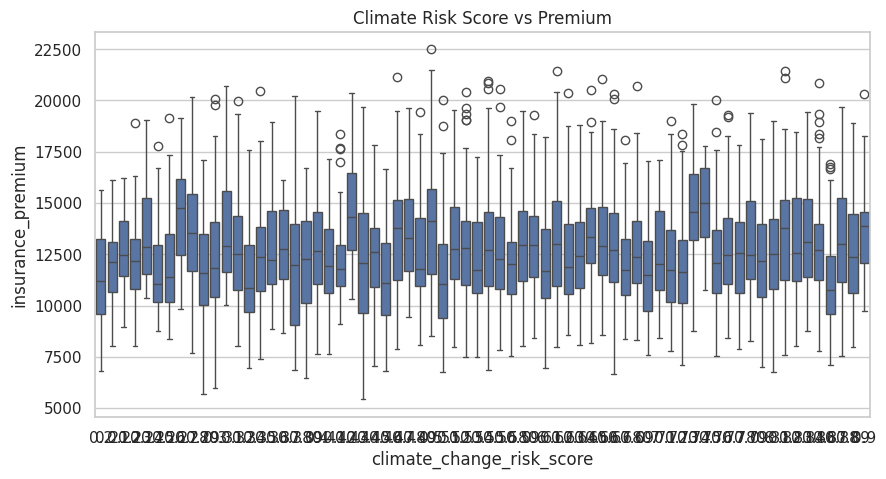

In [11]:
sns.boxplot(
    x="climate_change_risk_score",
    y="insurance_premium",
    data=df
)
plt.title("Climate Risk Score vs Premium")
plt.show()


Flood & disaster risk

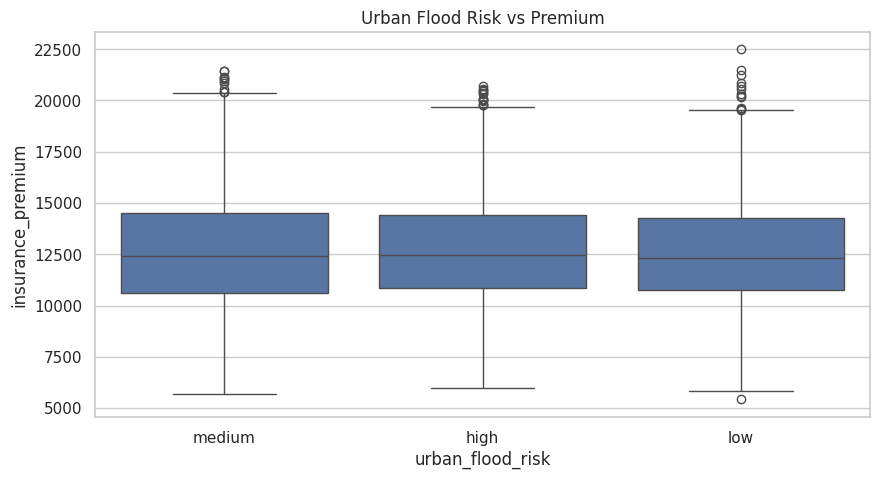

In [12]:
sns.boxplot(
    x="urban_flood_risk",
    y="insurance_premium",
    data=df
)
plt.title("Urban Flood Risk vs Premium")
plt.show()


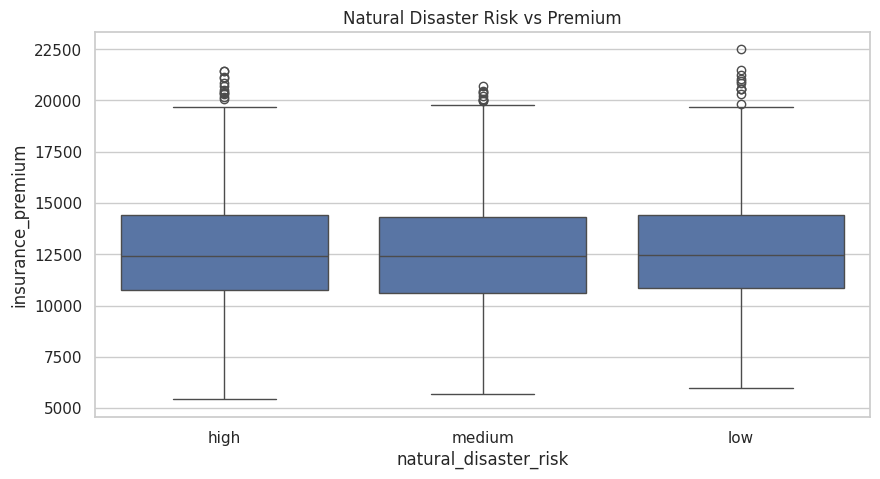

In [13]:
sns.boxplot(
    x="natural_disaster_risk",
    y="insurance_premium",
    data=df
)
plt.title("Natural Disaster Risk vs Premium")
plt.show()


Infrastructure Quality vs Premium

Road & drainage condition

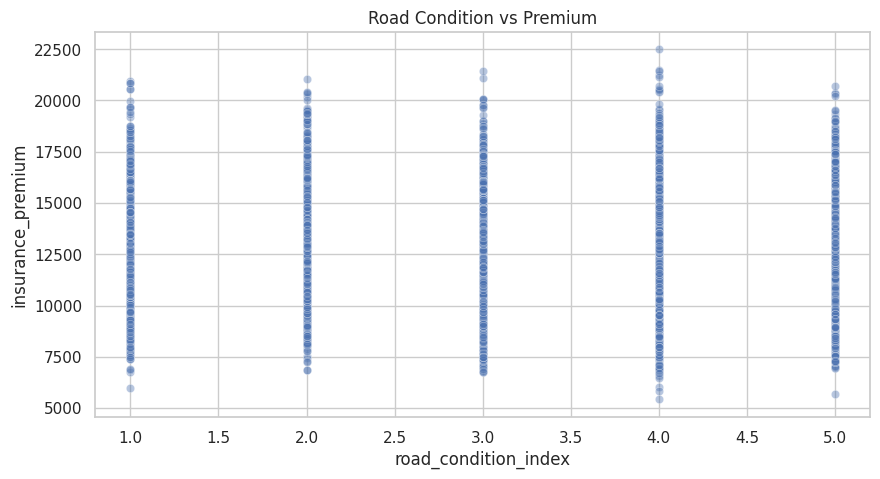

In [14]:
sns.scatterplot(
    x="road_condition_index",
    y="insurance_premium",
    data=df,
    alpha=0.4
)
plt.title("Road Condition vs Premium")
plt.show()


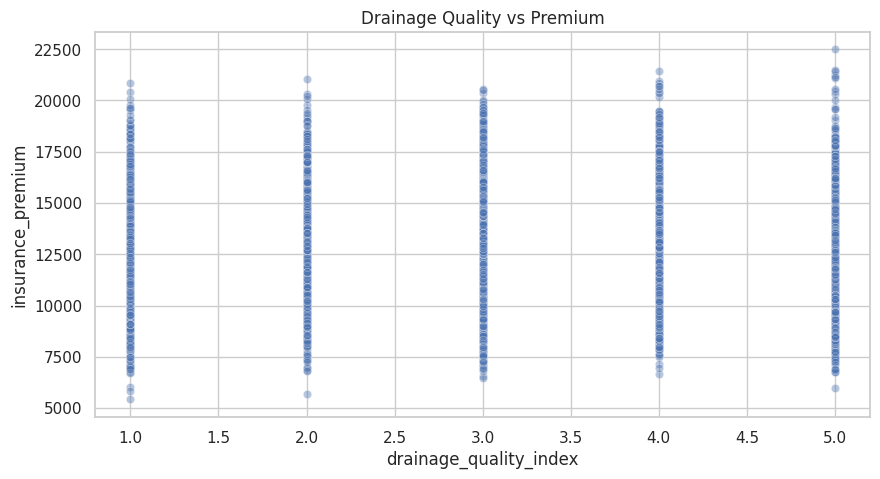

In [15]:
sns.scatterplot(
    x="drainage_quality_index",
    y="insurance_premium",
    data=df,
    alpha=0.4
)
plt.title("Drainage Quality vs Premium")
plt.show()


Industrial exposure

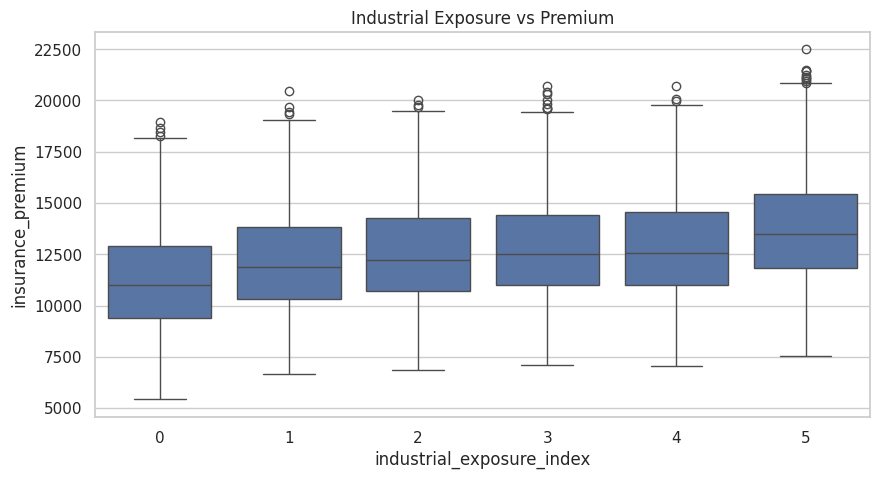

In [16]:
sns.boxplot(
    x="industrial_exposure_index",
    y="insurance_premium",
    data=df
)
plt.title("Industrial Exposure vs Premium")
plt.show()


Health & Personal Risk Factors

Age vs premium

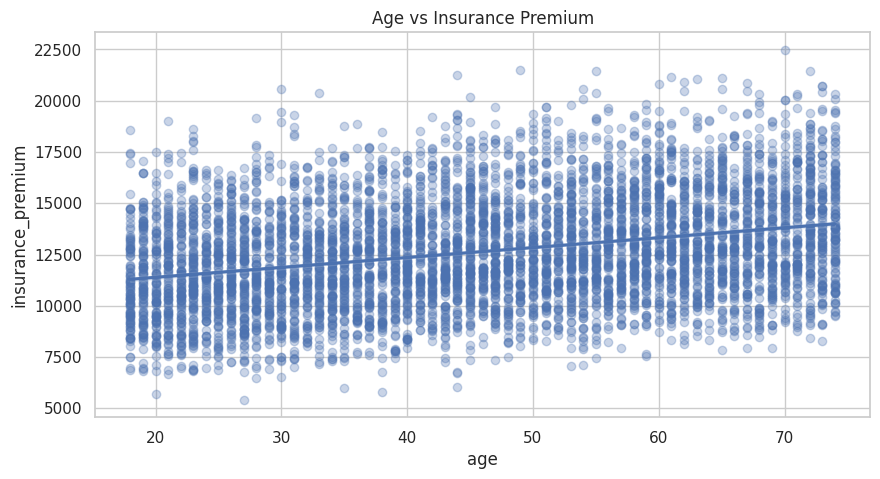

In [17]:
sns.regplot(
    x="age",
    y="insurance_premium",
    data=df,
    scatter_kws={"alpha":0.3}
)
plt.title("Age vs Insurance Premium")
plt.show()


Smoking & pre-existing conditions

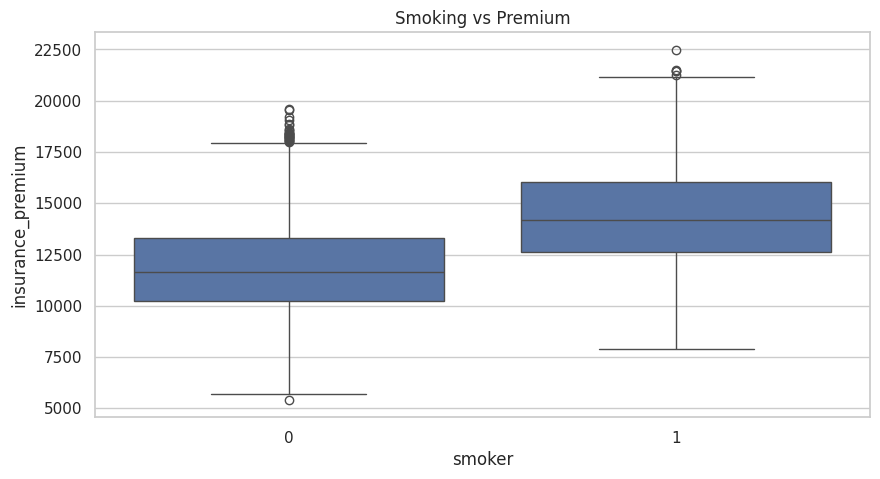

In [18]:
sns.boxplot(x="smoker", y="insurance_premium", data=df)
plt.title("Smoking vs Premium")
plt.show()


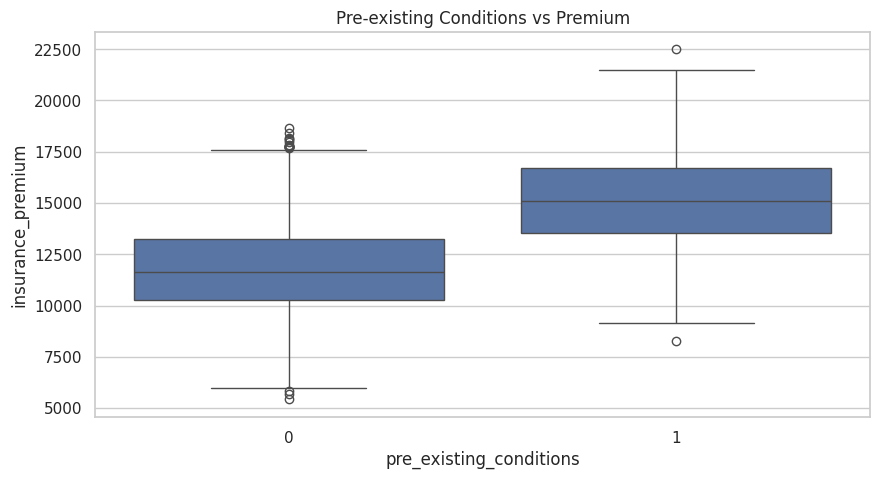

In [19]:
sns.boxplot(x="pre_existing_conditions", y="insurance_premium", data=df)
plt.title("Pre-existing Conditions vs Premium")
plt.show()


Disease rates

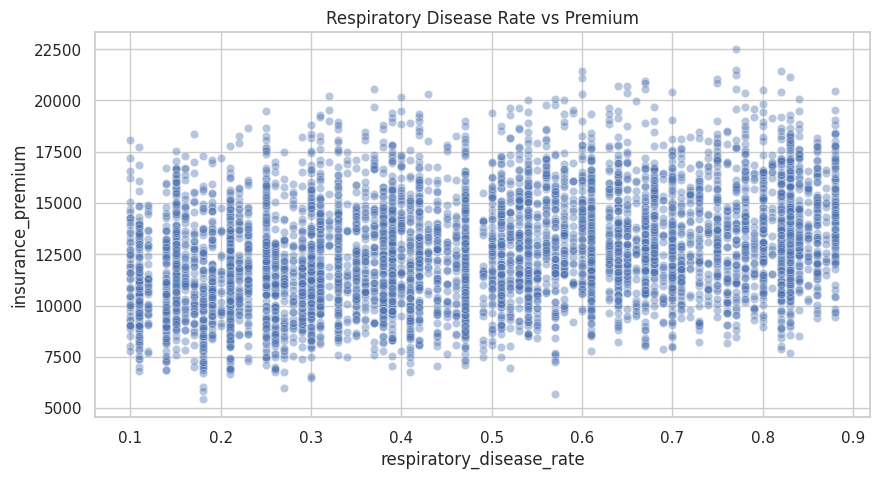

In [20]:
sns.scatterplot(
    x="respiratory_disease_rate",
    y="insurance_premium",
    data=df,
    alpha=0.4
)
plt.title("Respiratory Disease Rate vs Premium")
plt.show()


Coastal vs Inland Risk Comparison

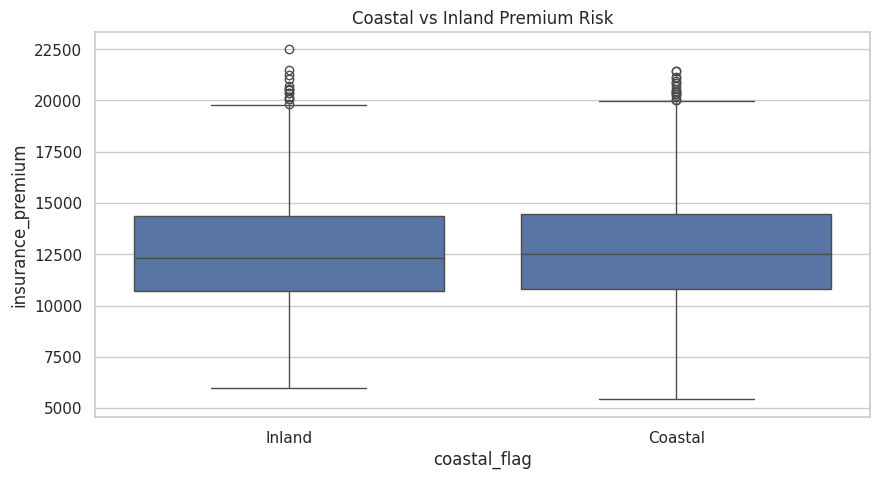

In [21]:
df["coastal_flag"] = (df["distance_from_coast_km"] < 50).astype(int)

sns.boxplot(
    x="coastal_flag",
    y="insurance_premium",
    data=df
)
plt.xticks([0,1], ["Inland","Coastal"])
plt.title("Coastal vs Inland Premium Risk")
plt.show()


Correlation & Multicollinearity Check

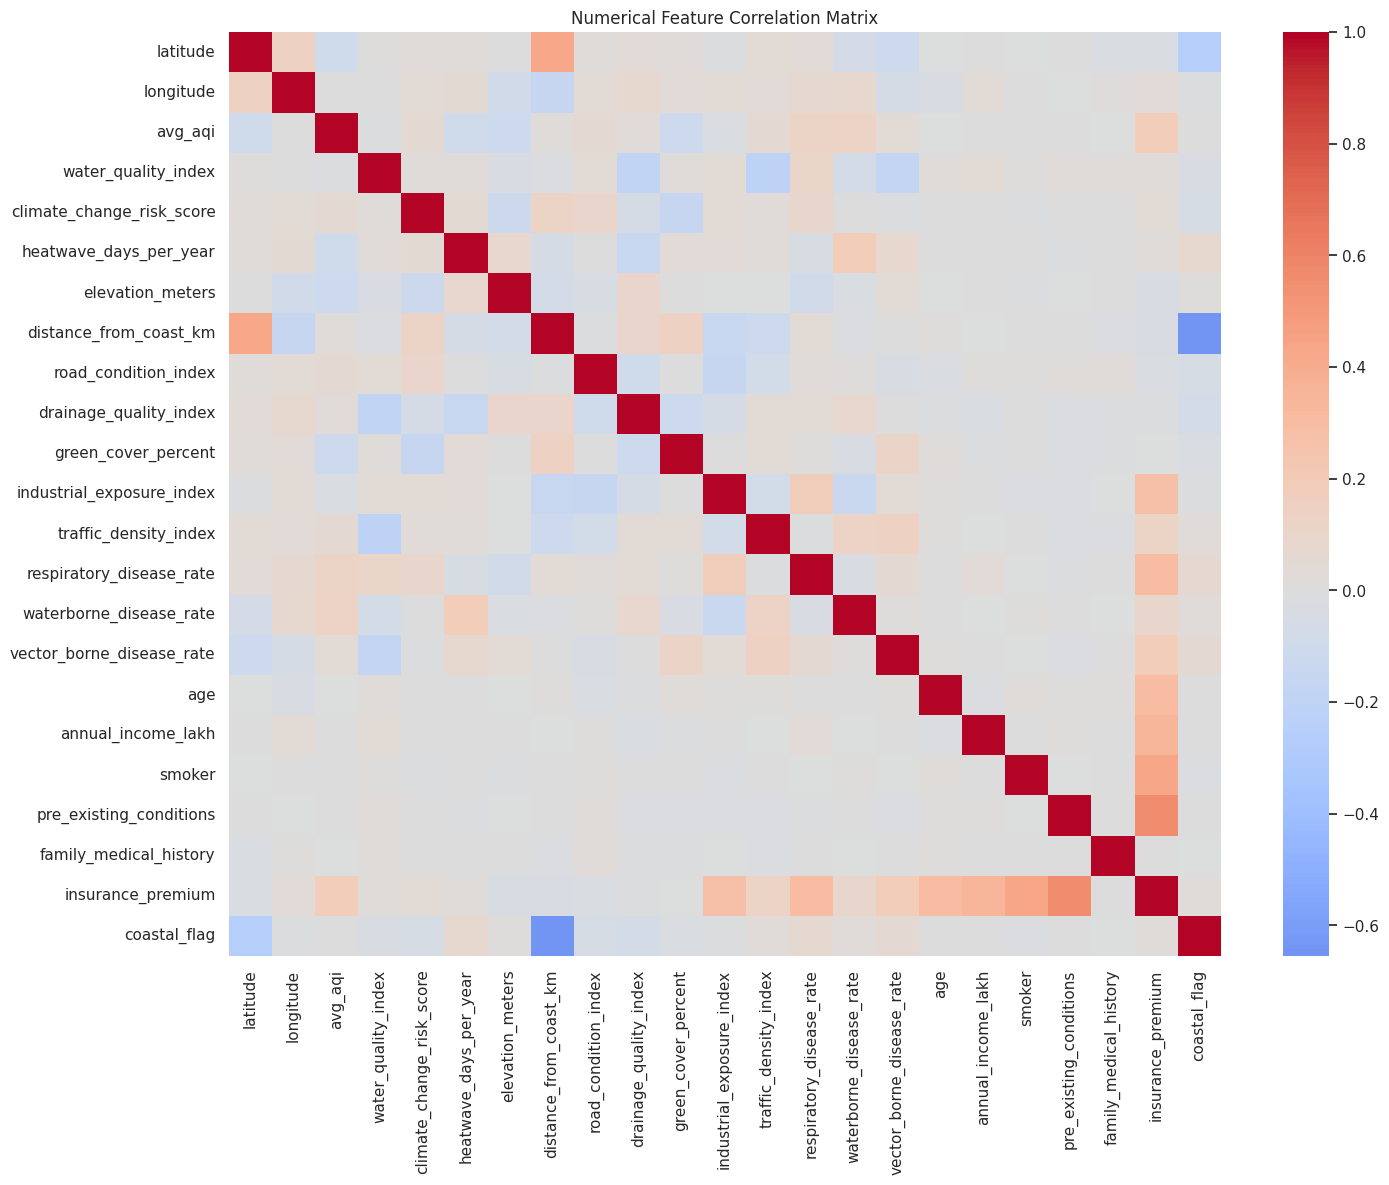

In [22]:
num_cols = df.select_dtypes(include=np.number)

corr = num_cols.corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Numerical Feature Correlation Matrix")
plt.show()


Key EDA Insights

Premiums are right-skewed, justifying log transformation.

Metro cities with higher AQI and traffic density show elevated premiums.

Slum and industrial localities have higher risk dispersion.

Climate risk, flood risk, and disease prevalence significantly affect premiums.

Personal factors (age, smoking, pre-existing conditions) dominate variance.

Coastal proximity increases premium volatility due to flood exposure.

